In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *
from pathlib import Path
import os

## Downloading and unzipping the data


- make the directories inside the data 

In [3]:
datadir = Path.home()/'data/Emotions/'         #The parent folder for the data to be downloaded
srcdir = datadir/'KDEF_and_AKDEF/'             #The folder(inside datadir) in which all the data will be downloaded
flatdir = datadir/'flat'                       #The folder(inside datadir) in which the flat files will be saved later
#!mkdir -p {flatdir}                            #make flat folder inside the parent folder(datadir)

- download the zip file and unzip it

In [11]:
# Only to download. So run once 
zip_url = 'http://kdef.se/download/KDEF_and_AKDEF.zip'
zip_file = datadir/"kdef.zip"
#if not srcdir.exists():
!wget -O {zip_file} {zip_url}         #wget -O will download into the zip_file using the url
!unzip {zip_file} -d {datadir}        #unzip the zip file and save the folders in the datadir path

--2019-02-25 14:43:13--  http://kdef.se/download/KDEF_and_AKDEF.zip
Resolving kdef.se (kdef.se)... 46.30.213.101, 2a02:2350:5:101:d940:0:d180:9b4f
Connecting to kdef.se (kdef.se)|46.30.213.101|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 524279485 (500M) [application/zip]
Saving to: '/home/kashishmukheja/data/kdef.zip'

/home/kashishmukhej 100%[===================>] 499.99M  5.61MB/s    in 3m 12s  

2019-02-25 14:46:27 (2.60 MB/s) - '/home/kashishmukheja/data/kdef.zip' saved [524279485/524279485]

Archive:  /home/kashishmukheja/data/kdef.zip
   creating: /home/kashishmukheja/data/KDEF_and_AKDEF/AKDEF/
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/AKDEF/FAFFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/AKDEF/FAFFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/AKDEF/FAFHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/AKDEF/FAFS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/AKDEF/FAHR.JPG  
  inf

  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF02/AF02NEFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF02/AF02NEFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF02/AF02NEHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF02/AF02NEHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF02/AF02NES.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF02/AF02SAFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF02/AF02SAFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF02/AF02SAHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF02/AF02SAHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF02/AF02SAS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF02/AF02SUFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF02/AF02SUFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/

  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF06/AF06AFHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF06/AF06AFHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF06/AF06AFS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF06/AF06ANFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF06/AF06ANFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF06/AF06ANHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF06/AF06ANHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF06/AF06ANS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF06/AF06DIFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF06/AF06DIFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF06/AF06DIHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF06/AF06DIHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/

  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF09/AF09DIS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF09/AF09HAFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF09/AF09HAFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF09/AF09HAHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF09/AF09HAHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF09/AF09HAS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF09/AF09NEFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF09/AF09NEFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF09/AF09NEHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF09/AF09NEHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF09/AF09NES.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF09/AF09SAFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/K

  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF12/AF12SUHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF12/AF12SUHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF12/AF12SUS.JPG  
   creating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF13/
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF13/AF13AFFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF13/AF13AFFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF13/AF13AFHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF13/AF13AFHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF13/AF13AFS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF13/AF13ANFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF13/AF13ANFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF13/AF13ANHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF13/AF13

  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF16/AF16HAFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF16/AF16HAFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF16/AF16HAHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF16/AF16HAHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF16/AF16HAS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF16/AF16NEFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF16/AF16NEFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF16/AF16NEHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF16/AF16NEHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF16/AF16NES.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF16/AF16SAFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF16/AF16SAFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/

  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF19/AF19SUFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF19/AF19SUHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF19/AF19SUHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF19/AF19SUS.JPG  
   creating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF20/
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF20/AF20AFFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF20/AF20AFFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF20/AF20AFHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF20/AF20AFHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF20/AF20AFS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF20/AF20ANFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF20/AF20ANFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF20/AF20

  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF22/AF22SUFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF22/AF22SUFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF22/AF22SUHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF22/AF22SUHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF22/AF22SUS.JPG  
   creating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF23/
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF23/AF23AFFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF23/AF23AFFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF23/AF23AFHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF23/AF23AFHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF23/AF23AFS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF23/AF23ANFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF23/AF23

  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF26/AF26AFS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF26/AF26ANFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF26/AF26ANFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF26/AF26ANHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF26/AF26ANHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF26/AF26ANS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF26/AF26DIFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF26/AF26DIFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF26/AF26DIHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF26/AF26DIHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF26/AF26DIS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF26/AF26HAFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/K

  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF29/AF29ANS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF29/AF29DIFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF29/AF29DIFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF29/AF29DIHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF29/AF29DIHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF29/AF29DIS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF29/AF29HAFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF29/AF29HAFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF29/AF29HAHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF29/AF29HAHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF29/AF29HAS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF29/AF29NEFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/K

  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF32/AF32NEHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF32/AF32NES.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF32/AF32SAFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF32/AF32SAFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF32/AF32SAHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF32/AF32SAHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF32/AF32SAS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF32/AF32SUFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF32/AF32SUFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF32/AF32SUHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF32/AF32SUHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF32/AF32SUS.JPG  
   creating: /home/kashishmukheja/data/KDEF_and_AKDEF/K

  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AF35/AF35SUS.JPG  
   creating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM01/
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM01/AM01AFFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM01/AM01AFFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM01/AM01AFHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM01/AM01AFHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM01/AM01AFS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM01/AM01ANFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM01/AM01ANFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM01/AM01ANHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM01/AM01ANHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM01/AM01ANS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM01/AM01D

  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM04/AM04HAHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM04/AM04HAS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM04/AM04NEFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM04/AM04NEFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM04/AM04NEHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM04/AM04NEHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM04/AM04NES.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM04/AM04SAFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM04/AM04SAFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM04/AM04SAHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM04/AM04SAHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM04/AM04SAS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/K

  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM07/AM07SAHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM07/AM07SAS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM07/AM07SUFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM07/AM07SUFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM07/AM07SUHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM07/AM07SUHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM07/AM07SUS.JPG  
   creating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM08/
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM08/AM08AFFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM08/AM08AFFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM08/AM08AFHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM08/AM08AFHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM08/AM08

  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM12/AM12DIFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM12/AM12DIHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM12/AM12DIHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM12/AM12DIS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM12/AM12HAFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM12/AM12HAFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM12/AM12HAHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM12/AM12HAHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM12/AM12HAS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM12/AM12NEFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM12/AM12NEFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM12/AM12NEHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/

  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM15/AM15NEHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM15/AM15NES.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM15/AM15SAFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM15/AM15SAFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM15/AM15SAHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM15/AM15SAHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM15/AM15SAS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM15/AM15SUFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM15/AM15SUFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM15/AM15SUHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM15/AM15SUHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM15/AM15SUS.JPG  
   creating: /home/kashishmukheja/data/KDEF_and_AKDEF/K

  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM18/AM18SAS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM18/AM18SUFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM18/AM18SUFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM18/AM18SUHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM18/AM18SUHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM18/AM18SUS.JPG  
   creating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM19/
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM19/AM19AFFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM19/AM19AFFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM19/AM19AFHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM19/AM19AFHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM19/AM19AFS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM19/AM19A

  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM21/AM21SUS.JPG  
   creating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM22/
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM22/AM22AFFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM22/AM22AFFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM22/AM22AFHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM22/AM22AFHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM22/AM22AFS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM22/AM22ANFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM22/AM22ANFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM22/AM22ANHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM22/AM22ANHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM22/AM22ANS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM22/AM22D

  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM25/AM25ANS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM25/AM25DIFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM25/AM25DIFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM25/AM25DIHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM25/AM25DIHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM25/AM25DIS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM25/AM25HAFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM25/AM25HAFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM25/AM25HAHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM25/AM25HAHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM25/AM25HAS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM25/AM25NEFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/K

  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM28/AM28HAHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM28/AM28HAS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM28/AM28NEFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM28/AM28NEFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM28/AM28NEHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM28/AM28NEHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM28/AM28NES.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM28/AM28SAFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM28/AM28SAFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM28/AM28SAHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM28/AM28SAHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM28/AM28SAS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/K

  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM31/AM31SAHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM31/AM31SAS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM31/AM31SUFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM31/AM31SUFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM31/AM31SUHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM31/AM31SUS.JPG  
   creating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM32/
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM32/AM32AFFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM32/AM32AFFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM32/AM32AFHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM32/AM32AFHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM32/AM32AFS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM32/AM32A

  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM35/AM35ANHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM35/AM35ANS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM35/AM35DIFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM35/AM35DIFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM35/AM35DIHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM35/AM35DIHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM35/AM35DIS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM35/AM35HAFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM35/AM35HAFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM35/AM35HAHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM35/AM35HAHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/AM35/AM35HAS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/K

  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF03/BF03SAS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF03/BF03SUFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF03/BF03SUFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF03/BF03SUHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF03/BF03SUHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF03/BF03SUS.JPG  
   creating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF04/
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF04/BF04AFFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF04/BF04AFFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF04/BF04AFHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF04/BF04AFHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF04/BF04AFS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF04/BF04A

  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF07/BF07DIHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF07/BF07DIHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF07/BF07DIS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF07/BF07HAFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF07/BF07HAFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF07/BF07HAHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF07/BF07HAHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF07/BF07HAS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF07/BF07NEFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF07/BF07NEFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF07/BF07NEHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF07/BF07NEHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/

  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF10/BF10SUFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF10/BF10SUHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF10/BF10SUHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF10/BF10SUS.JPG  
   creating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF11/
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF11/BF11AFFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF11/BF11AFFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF11/BF11AFHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF11/BF11AFHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF11/BF11AFS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF11/BF11ANFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF11/BF11ANFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF11/BF11

  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF14/BF14DIHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF14/BF14DIS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF14/BF14HAFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF14/BF14HAFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF14/BF14HAHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF14/BF14HAHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF14/BF14HAS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF14/BF14NEFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF14/BF14NEFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF14/BF14NEHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF14/BF14NEHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF14/BF14NES.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/K

  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF17/BF17SUFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF17/BF17SUFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF17/BF17SUHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF17/BF17SUHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF17/BF17SUS.JPG  
   creating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF18/
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF18/BF18AFFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF18/BF18AFFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF18/BF18AFHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF18/BF18AFHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF18/BF18AFS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF18/BF18ANFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF18/BF18

  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF21/BF21DIFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF21/BF21DIHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF21/BF21DIHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF21/BF21DIS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF21/BF21HAFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF21/BF21HAFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF21/BF21HAHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF21/BF21HAHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF21/BF21HAS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF21/BF21NEFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF21/BF21NEFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF21/BF21NEHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/

  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF24/BF24NEHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF24/BF24NEHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF24/BF24NES.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF24/BF24SAFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF24/BF24SAFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF24/BF24SAHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF24/BF24SAHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF24/BF24SAS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF24/BF24SUFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF24/BF24SUFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF24/BF24SUHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF24/BF24SUHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/

  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF27/BF27SUFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF27/BF27SUFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF27/BF27SUHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF27/BF27SUHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF27/BF27SUS.JPG  
   creating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF28/
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF28/BF28AFFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF28/BF28AFFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF28/BF28AFHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF28/BF28AFHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF28/BF28AFS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF28/BF28ANFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF28/BF28

  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF31/BF31DIFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF31/BF31DIHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF31/BF31DIHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF31/BF31DIS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF31/BF31HAFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF31/BF31HAFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF31/BF31HAHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF31/BF31HAHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF31/BF31HAS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF31/BF31NEFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF31/BF31NEFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF31/BF31NEHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/

  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF34/BF34NES.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF34/BF34SAFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF34/BF34SAFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF34/BF34SAHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF34/BF34SAHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF34/BF34SAS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF34/BF34SUFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF34/BF34SUFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF34/BF34SUHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF34/BF34SUHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF34/BF34SUS.JPG  
   creating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF35/
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BF35/BF35A

  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM03/BM03AFHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM03/BM03AFS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM03/BM03ANFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM03/BM03ANFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM03/BM03ANHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM03/BM03ANHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM03/BM03ANS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM03/BM03DIFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM03/BM03DIFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM03/BM03DIHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM03/BM03DIHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM03/BM03DIS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/K

  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM06/BM06NEFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM06/BM06NEHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM06/BM06NEHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM06/BM06NES.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM06/BM06SAFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM06/BM06SAFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM06/BM06SAHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM06/BM06SAHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM06/BM06SAS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM06/BM06SUFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM06/BM06SUFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM06/BM06SUHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/

  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM10/BM10AFFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM10/BM10AFHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM10/BM10AFHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM10/BM10AFS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM10/BM10ANFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM10/BM10ANFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM10/BM10ANHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM10/BM10ANHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM10/BM10ANS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM10/BM10DIFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM10/BM10DIFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM10/BM10DIHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/

  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM13/BM13NEFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM13/BM13NEHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM13/BM13NEHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM13/BM13NES.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM13/BM13SAFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM13/BM13SAFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM13/BM13SAHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM13/BM13SAHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM13/BM13SAS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM13/BM13SUFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM13/BM13SUFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM13/BM13SUHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/

  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM17/BM17AFHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM17/BM17AFS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM17/BM17ANFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM17/BM17ANFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM17/BM17ANHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM17/BM17ANHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM17/BM17ANS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM17/BM17DIFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM17/BM17DIFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM17/BM17DIHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM17/BM17DIHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM17/BM17DIS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/K

  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM20/BM20NEHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM20/BM20NEHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM20/BM20NES.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM20/BM20SAFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM20/BM20SAFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM20/BM20SAHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM20/BM20SAHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM20/BM20SAS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM20/BM20SUFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM20/BM20SUFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM20/BM20SUHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM20/BM20SUHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/

  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM24/BM24ANFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM24/BM24ANHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM24/BM24ANHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM24/BM24ANS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM24/BM24DIFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM24/BM24DIFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM24/BM24DIHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM24/BM24DIHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM24/BM24DIS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM24/BM24HAFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM24/BM24HAFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM24/BM24HAHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/

  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM27/BM27SAHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM27/BM27SAHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM27/BM27SAS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM27/BM27SUFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM27/BM27SUFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM27/BM27SUHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM27/BM27SUHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM27/BM27SUS.JPG  
   creating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM28/
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM28/BM28AFFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM28/BM28AFFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM28/BM28AFHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM28/BM28

  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM31/BM31DIFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM31/BM31DIHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM31/BM31DIHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM31/BM31DIS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM31/BM31HAFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM31/BM31HAFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM31/BM31HAHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM31/BM31HAHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM31/BM31HAS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM31/BM31NEFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM31/BM31NEFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM31/BM31NEHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/

  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM34/BM34SAFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM34/BM34SAHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM34/BM34SAHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM34/BM34SAS.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM34/BM34SUFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM34/BM34SUFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM34/BM34SUHL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM34/BM34SUHR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM34/BM34SUS.JPG  
   creating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM35/
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM35/BM35AFFL.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM35/BM35AFFR.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEF/BM35/BM35

  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEFmap/AM33.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEFmap/AM34.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEFmap/AM35.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEFmap/BF01.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEFmap/BF02.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEFmap/BF03.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEFmap/BF04.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEFmap/BF05.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEFmap/BF06.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEFmap/BF07.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEFmap/BF08.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEFmap/BF09.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKDEF/KDEFmap/BF10.JPG  
  inflating: /home/kashishmukheja/data/KDEF_and_AKD

In [4]:
!ls {srcdir}

AKDEF  AKDEFmap  KDEF  KDEFmap	ReadThis  ReadThis.TXT	References.txt


## File and folder handling
The files are in different folders. We need to move all the files to a single directory 

In [8]:
if not os.listdir(flatdir):
    sourcedata = srcdir/"KDEF"
    for folders in sourcedata.iterdir():
        for imgs_source in folders.iterdir():
            imgs_dest = flatdir.joinpath(imgs_source.name)
            os.link(imgs_source,imgs_dest)
"""Can also use the os.walk() method to make it shorter"""

Now, We have to correct some incorrect filenames 

In [9]:
correct_name = {
    'AF31V': 'AF31SAHL',
    'AM31H': 'AM31SUHR',
}
for wrng,right in correct_name.items():
    os.rename(flatdir/(wrng+".JPG"),flatdir/(right+".JPG"))    #rename the images from wrng to right

"""Alternatively, instead of using os.rename, we can also use 
import shutil
shutil.move(flatdir/(wrng+".JPG"),flatdir/(right+".JPG"))
"""

In [7]:
fnames = get_image_files(flatdir, check_ext=False)
fnames[:5]

[PosixPath('/home/kashishmukheja/data/Emotions/flat/BM19NES.JPG'),
 PosixPath('/home/kashishmukheja/data/Emotions/flat/BF21SUFR.JPG'),
 PosixPath('/home/kashishmukheja/data/Emotions/flat/BM27SAHR.JPG'),
 PosixPath('/home/kashishmukheja/data/Emotions/flat/BF17NEHR.JPG'),
 PosixPath('/home/kashishmukheja/data/Emotions/flat/BM33AFHL.JPG')]

In [5]:
np.random.seed(2)
#pat = re.compile(r'/\w{4}(\w{2})\w{1,2}\.JPG')
pat = r'/\w{4}(\w{2})\w{1,2}\.JPG$'

In [8]:
import re
lab = set()
for imgs in fnames:
    reglab = re.search(pat,imgs.as_posix())
    label_extract = reglab.group(1)
    lab.add(label_extract)

In [9]:
lab

{'AF', 'AN', 'DI', 'HA', 'NE', 'SA', 'SU'}

## Learning

In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [11]:
device

device(type='cuda')

In [32]:
tfms=get_transforms(max_zoom=1,max_warp=None)
data = ImageDataBunch.from_name_re(flatdir,fnames,pat,ds_tfms=tfms,size=224,bs=16)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (3920 items)
x: ImageItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
NE,SU,SA,NE,AF
Path: /home/kashishmukheja/data/Emotions/flat;

Valid: LabelList (980 items)
x: ImageItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
SU,SA,HA,SA,SA
Path: /home/kashishmukheja/data/Emotions/flat;

Test: None

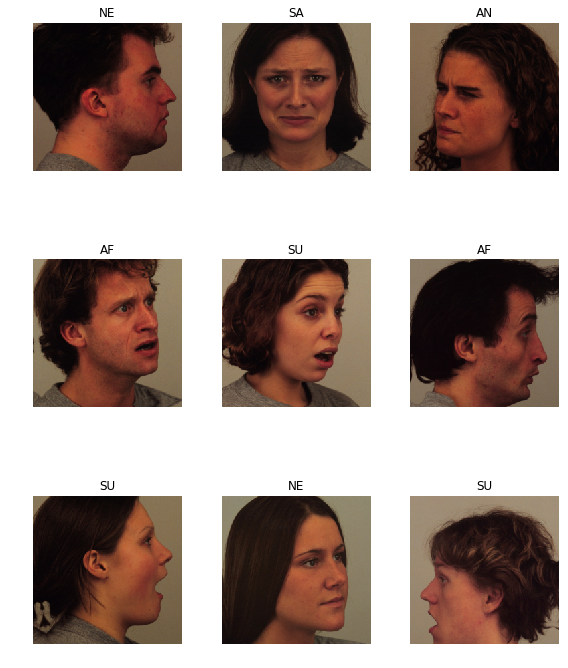

In [28]:
data.show_batch(rows=3, figsize=(8,10))

In [22]:
"""!conda install fastai  -c fastai -c pytorch --yes

import fastai

fastai.__version__"""

Fetching package metadata ...............
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /home/kashishmukheja/anaconda3/envs/fastai:
#
fastai                    1.0.45                        1    fastai


In [33]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['AF', 'AN', 'DI', 'HA', 'NE', 'SA', 'SU'], 7, 3920, 980)

- AF : Afraid 
- AN : Angry
- DI : Disgusted/Frustrated
- HA : Happy
- NE : Neutral
- SA : Sad
- SU : Surprised

## Train Model

In [16]:
model="resnet34"

In [34]:
learn = create_cnn(data,models.resnet34,metrics=error_rate)

In [26]:
!nvidia-smi

Wed Feb 27 18:18:38 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.39       Driver Version: 418.39       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P0    67W / 149W |    358MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [35]:
learn.fit_one_cycle(4)

  - we got error rate of 40% bs=16,max_warp=1

In [38]:
learn.save("-stage-1-" + "Feb28")
#learn.load("/home/jupyter/data/food_new/weights/resnet50-stage-1-Nov5")

In [36]:
learn.unfreeze()

In [37]:
learn.fit_one_cycle(1)

### With almost no tweaking of parameters, we got 16.6% error rate

In [38]:
tfms = get_transforms(max_warp=None)

data = ImageDataBunch.from_name_re(flatdir,fnames,pat,ds_tfms=tfms,size=224,bs=16)
data.normalize(imagenet_stats)

#data.show_batch(rows=3, figsize=(8,10))

learn = create_cnn(data,models.resnet34,metrics=error_rate)

In [39]:
learn.fit_one_cycle(4)

- On decreasing the batch size, and doing max_warp=None, our error rate went to 38%

In [40]:
learn.save("stage-2")

In [41]:
tfms = get_transforms(max_zoom=1, max_lighting=0.1,max_warp=None)

data = ImageDataBunch.from_name_re(flatdir,fnames,pat,ds_tfms=tfms,size=224,bs=16)
data.normalize(imagenet_stats)

#data.show_batch(rows=3, figsize=(8,10))

learn = create_cnn(data,models.resnet34,metrics=error_rate)

In [42]:
learn.fit_one_cycle(4)

- Max_zoom to 1,max_lighting=0.1 we brought down the error rate to 37.6%

In [43]:
learn.save("Stage 3")

In [44]:
learn.unfreeze()

In [45]:
learn.fit_one_cycle(1)

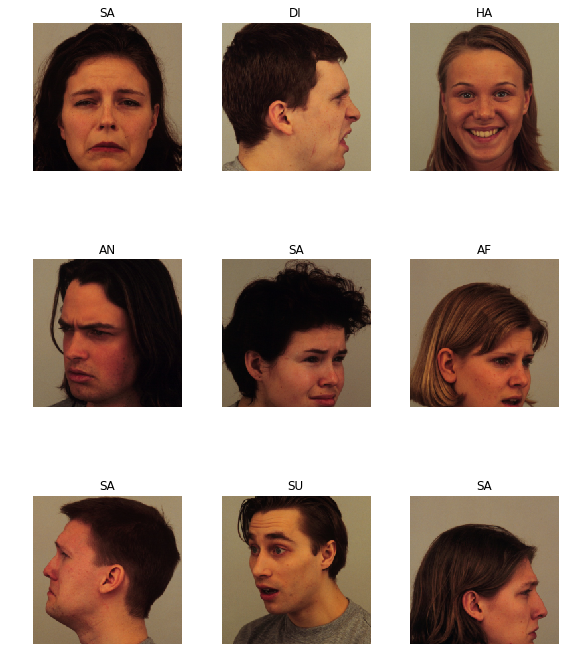

In [22]:
tfms = get_transforms(max_zoom=1,max_rotate=6,max_lighting=0.1,max_warp=None)

data = ImageDataBunch.from_name_re(flatdir,fnames,pat,ds_tfms=tfms,size=224,bs=16)
data.normalize(imagenet_stats)

data.show_batch(rows=3, figsize=(8,10))

learn = create_cnn(data,models.resnet34,metrics=error_rate)

In [23]:
data.classes,data.c,len(data.train_ds),len(data.valid_ds)

(['AF', 'AN', 'DI', 'HA', 'NE', 'SA', 'SU'], 7, 3920, 980)

In [24]:
learn.fit_one_cycle(5)

- max_lighting and max rotate furthur brought down error(not unfreezed) to 32.5%

In [25]:
learn.save("stage 4")

### Try some more tweaks 

In [16]:
""""tfms = get_transforms(max_zoom=1,max_rotate=5,max_warp=None)

data = ImageDataBunch.from_name_re(flatdir,fnames,pat,ds_tfms=tfms,size=224,bs=16)
data.normalize(imagenet_stats)

#data.show_batch(rows=3, figsize=(8,10))

learn = create_cnn(data,models.resnet34,metrics=error_rate)

learn.fit_one_cycle(5)"""

In [18]:
learn.save("stage 5")

In [19]:
"""tfms = get_transforms(max_zoom=1,max_rotate=6,max_warp=None)

data = ImageDataBunch.from_name_re(flatdir,fnames,pat,ds_tfms=tfms,size=224,bs=16)
data.normalize(imagenet_stats)

#data.show_batch(rows=3, figsize=(8,10))

learn = create_cnn(data,models.resnet34,metrics=error_rate)

learn.fit_one_cycle(5)"""

In [20]:
"""learn.save("stage 6")"""

In [21]:
"""tfms = get_transforms(max_zoom=1,max_lighting=0.3,max_rotate=6,max_warp=None)

data = ImageDataBunch.from_name_re(flatdir,fnames,pat,ds_tfms=tfms,size=224,bs=16)
data.normalize(imagenet_stats)

#data.show_batch(rows=3, figsize=(8,10))

learn = create_cnn(data,models.resnet34,metrics=error_rate)

learn.fit_one_cycle(5)"""

## we interpret our stage 4 learn model

In [26]:
learn.unfreeze()

In [27]:
learn.fit_one_cycle(1)

In [32]:
learn.load("stage 4")

Learner(data=ImageDataBunch;

Train: LabelList (3920 items)
x: ImageItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
NE,SU,SA,NE,AF
Path: /home/kashishmukheja/data/Emotions/flat;

Valid: LabelList (980 items)
x: ImageItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
HA,NE,NE,AF,AF
Path: /home/kashishmukheja/data/Emotions/flat;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentu

In [33]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.10E-06


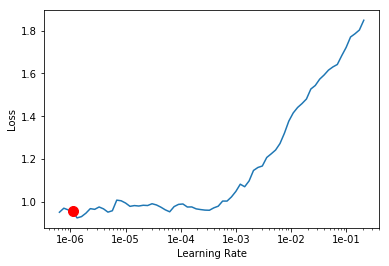

In [34]:
learn.recorder.plot()

In [35]:
learn.unfreeze()

In [36]:
learn.fit_one_cycle(4, max_lr=slice(3e-5,3e-4))

In [37]:
learn.save("stage 4u 3e-5 8.6%")

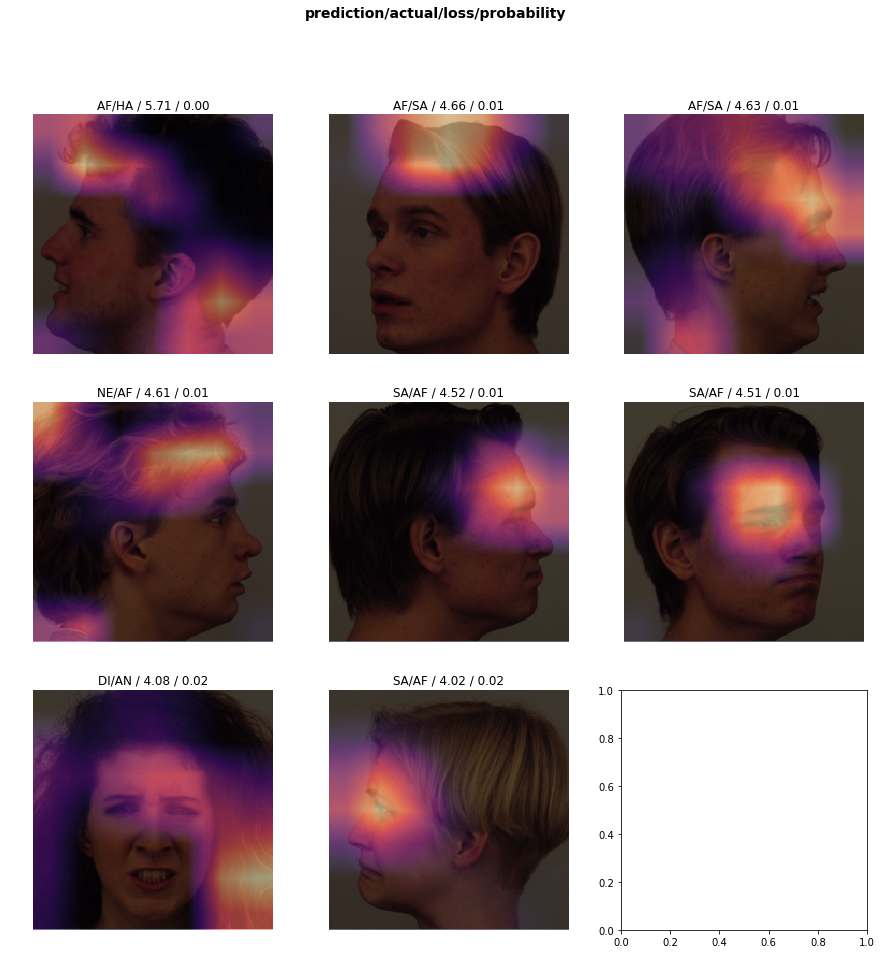

In [38]:
interp = ClassificationInterpretation.from_learner(learn)

interp.plot_top_losses(8, figsize=(15,15))

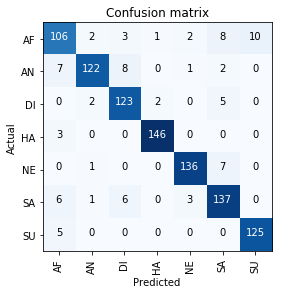

In [39]:
interp.plot_confusion_matrix()

In [40]:
interp.most_confused(min_val=3)

[('AF', 'SU', 10),
 ('AF', 'SA', 8),
 ('AN', 'DI', 8),
 ('AN', 'AF', 7),
 ('NE', 'SA', 7),
 ('SA', 'AF', 6),
 ('SA', 'DI', 6),
 ('DI', 'SA', 5),
 ('SU', 'AF', 5)]

## Prediction

In [41]:
data.classes

['AF', 'AN', 'DI', 'HA', 'NE', 'SA', 'SU']

In [42]:
Path.home()

PosixPath('/home/kashishmukheja')

In [47]:
path = Path('/home/kashishmukheja/data/Emotions')

img = open_image(path/'kash.jpg')

In [51]:
pred_class,pred_idx,outputs = learn.predict(img)

In [52]:
pred_class

Category HA

In [53]:
outputs

tensor([0.1894, 0.0374, 0.0937, 0.4802, 0.0339, 0.0507, 0.1147])

In [93]:
path = Path('/home/kashishmukheja/data/Emotions')

img = open_image(path/'hughang.jpg')

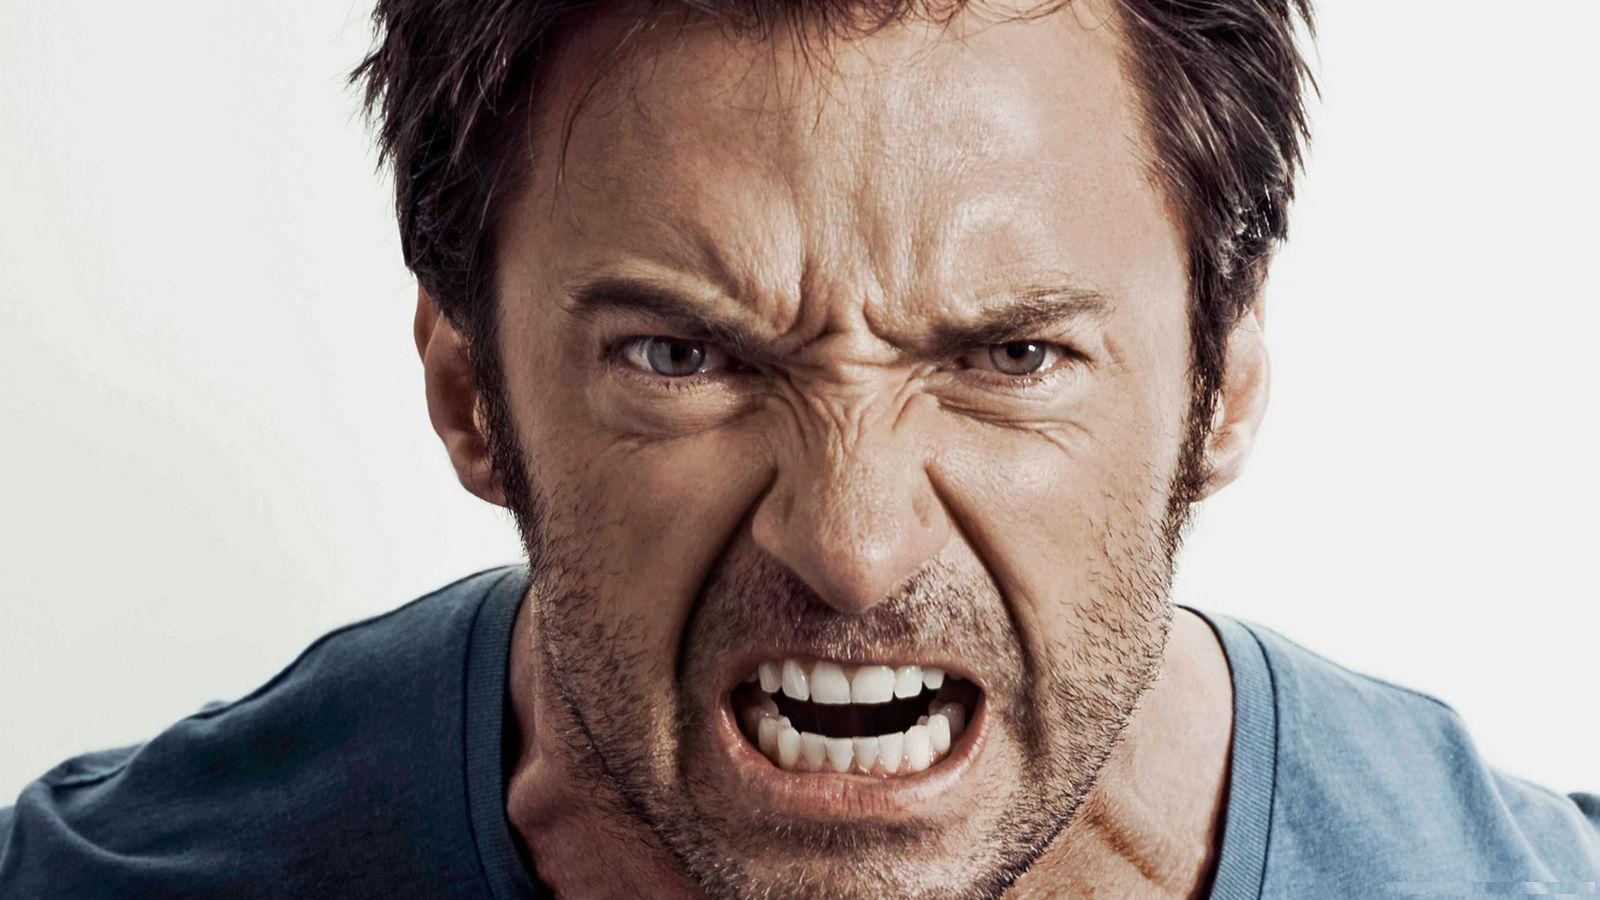

In [94]:
img

In [95]:
pred_class,pred_idx,outputs = learn.predict(img)

In [96]:
pred_class

Category AN

In [97]:
outputs

tensor([0.0040, 0.7604, 0.1948, 0.0298, 0.0029, 0.0059, 0.0021])

In [89]:
path = Path('/home/kashishmukheja/data/Emotions')

img = open_image(path/'kimcry.png')

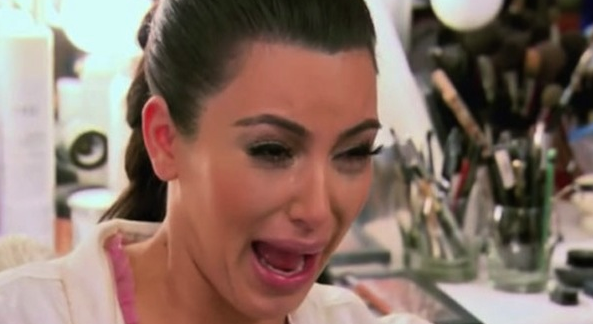

In [90]:
img

In [91]:
pred_class,pred_idx,outputs = learn.predict(img)

In [92]:
pred_class

Category DI

### So, we saw that our predictions are definitely not bad even on the real world, outside images of people.
- I havent used resnet50 architecture but it could make the prediction a little bit more accurate.